In [245]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
nombre_archivo_excel = 'sonido.xlsx'

In [246]:
def minimos_cuadrados_incertidumbre(x,y,t,i,name="Regresion",plot = True,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x)+intercepto
    normalize_residuales = (y-pendiente*x+intercepto)/error_m
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})
        axs[0].errorbar(x, y,xerr=t, yerr=i, fmt='.')       
        axs[0].plot(x,pendiente*x+intercepto)
        axs[1].scatter(x,residuales)
        axs[2].scatter(x,normalize_residuales)
        axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[0].set_ylabel("Longitud [cm]")
        axs[1].set_ylabel('Residuales')
        axs[2].set_ylabel('Residuales Normalizados')
        plt.xlabel('k')
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    return pendiente,intercepto, error_inter, error_m, residuales, normalize_residuales

In [247]:
todas_las_hojas = pd.read_excel(nombre_archivo_excel, sheet_name=None, engine='openpyxl')
df = todas_las_hojas['Hoja1']
k1 = np.array(df.iloc[3:9, 2])/(4000)
L1 = np.array(df.iloc[3:9, 3])
k2 = np.array(df.iloc[3:14, 2])/(4*2000)
L2 = np.array(df.iloc[3:14, 5])
k3 = np.array(df.iloc[3:15, 2])/(4*2500)
L3 = np.array(df.iloc[3:15, 7])
k4 = np.array(df.iloc[3:17, 2])/(4*3000)
L4 = np.array(df.iloc[3:17, 9])
print(L1)

[8 25.3 40.3 54.5 71.6 89]


In [248]:
ek1 = 0
eL1 = np.array(0.01*np.ones(len(k1)))
v1 = minimos_cuadrados_incertidumbre(k1, L1, ek1, eL1, plot = False)
ek2 = 0
eL2 = np.array(0.01*np.ones(len(k2)))
v2 = minimos_cuadrados_incertidumbre(k2, L2, ek2, eL2, plot = False)
ek3 = 0
eL3 = np.array(0.01*np.ones(len(k3)))
v3 = minimos_cuadrados_incertidumbre(k3, L3, ek3, eL3, plot = False)
ek4 = 0
eL4 = np.array(0.01*np.ones(len(k4)))
v4 = minimos_cuadrados_incertidumbre(k4, L4, ek4, eL4, plot = False)

Text(0.5, 36.72222222222235, '$\\frac{k}{4f}$')

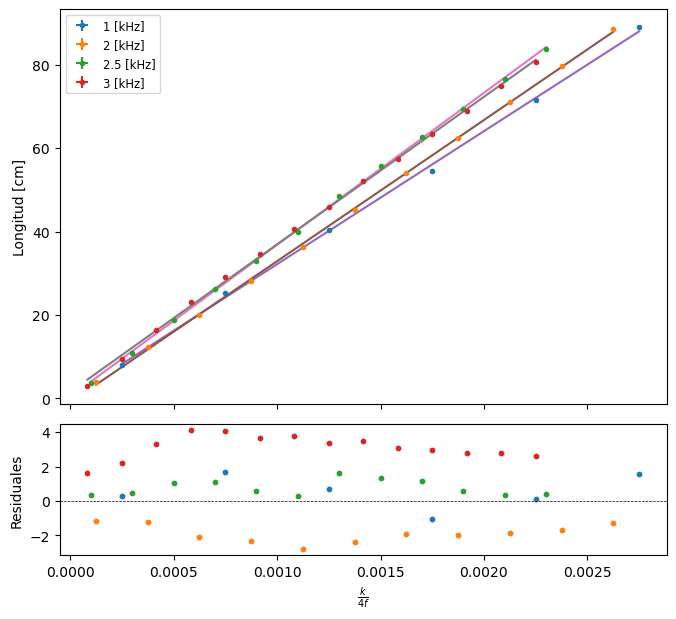

In [257]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
axs[0].errorbar(k1, L1,xerr=ek1, yerr=eL1, fmt='.', label="1 [kHz]" )
axs[0].errorbar(k2, L2,xerr=ek2, yerr=eL2, fmt='.', label="2 [kHz]" )
axs[0].errorbar(k3, L3,xerr=ek3, yerr=eL3, fmt='.', label="2.5 [kHz]" )
axs[0].errorbar(k4, L4,xerr=ek4, yerr=eL4, fmt='.', label="3 [kHz]" )
axs[0].plot(k1,v1[0]*k1+v1[1])
axs[0].plot(k2,(v2[0]*k2+v2[1]))
axs[0].plot(k3,(v3[0]*k3+v3[1]))
axs[0].plot(k4,(v4[0]*k4+v4[1]))
axs[0].set_ylabel("Longitud [cm]")
axs[0].legend(fontsize="small")
axs[1].scatter(k1, v1[4],label="1 [kHz]", s=10)
axs[1].scatter(k2, v2[4],label="2 [kHz]", s=10)
axs[1].scatter(k3, v3[4],label="2.5 [kHz]", s=10)
axs[1].scatter(k4, v4[4],label="3 [kHz]", s=10)
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[1].set_ylabel("Residuales")
plt.tight_layout()
plt.xlabel(r'$\frac{k}{4f}$', fontsize=10)

In [250]:
print(v1[0]*0.01,v1[3]*0.01)
print(v2[0]*0.01,v2[3]*0.01)
print(v3[0]*0.01,v3[3]*0.01)
print(v4[0]*0.01,v4[3]*0.01)

318.9142857142857 0.047809144373375745
338.36363636363643 0.03813850356982369
364.35314685314705 0.04181210050035454
353.6571428571428 0.03977961264790776


In [255]:
lambda1 = np.array(df.iloc[3:9, 4])
print(np.mean(lambda1)*0.01)
lambda2 = np.array(df.iloc[3:14, 6])
print(np.mean(lambda2)*0.01)
lambda3 = np.array(df.iloc[3:15, 8])
print(np.mean(lambda3)*0.01)
lambda4 = np.array(df.iloc[3:21, 10])
print(np.mean(lambda4)*0.01)

0.3221700817700818
0.1642843749989261
0.14721628198158018
0.12400628497127392


In [256]:
print(np.mean(lambda1)*1*0.01*1000)
print(np.mean(lambda2)*2*0.01*1000)
print(np.mean(lambda3)*2.5*0.01*1000)
print(np.mean(lambda4)*3*0.01*1000)

322.17008177008177
328.5687499978522
368.04070495395047
372.0188549138217
